# 1. Import Libraries 

In [22]:
from owl2vec_star import owl2vec_star

import sys
sys.path.append("../")

from rdflib import Graph
from rdflib import URIRef, BNode, Literal
from rdflib import Namespace
from rdflib.namespace import OWL, RDF, RDFS, FOAF, XSD
from rdflib.util import guess_format

import pandas as pd
import numpy as np

import altair as alt
from altair import datum
alt.data_transformers.disable_max_rows()
import matplotlib.pyplot as plt

#Kmeans
from sklearn.cluster import KMeans

#T-SNE
from sklearn.manifold import MDS, TSNE


# 1. Train OWL2Vec

In [99]:
#OWL2Vec* Code downloaded from - https://github.com/KRR-Oxford/OWL2Vec-Star
#Code to run model used from SWTKG Lab 9 - Ernesto Jimenez Ruiz
gensim_model = owl2vec_star.extract_owl2vec_model("./dissertation/AWA2_KG01_basic_attributes_04.owl", "./KG04_AwA2.cfg", True, True, False)

output_folder="./cache/output/"

#Gensim format
gensim_model.save(output_folder+"AwA2_option04.embeddings", )
#Txt format
gensim_model.wv.save_word2vec_format(output_folder+"AwA2_option04.embeddings.txt", binary=False)


INFO: Access the ontology ...
INFO: There are 4691 triples in the ontology
INFO: Extract classes and individuals ...
INFO: Extract axioms ...
INFO: Extract annotations ...
INFO: Generate URI document ...
INFO: Extracted 0 walks for 0 seed entities
INFO: Extracted 4473 axiom sentences
INFO: Generate literal document ...
INFO: Extracted 0 annotation sentences
INFO: URI_Doc: 4473, Lit_Doc: 4473, Mix_Doc: 0
INFO: Time for document construction: 2.8826944828033447 seconds
INFO: Train the language model ...
INFO: collecting all words and their counts
INFO: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO: collected 518 word types from a corpus of 34609 raw words and 8946 sentences
INFO: Creating a fresh vocabulary
INFO: Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 475 unique words (91.6988416988417%% of original 518, drops 43)', 'datetime': '2022-12-10T18:17:50.090868', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 

INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; 

INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 10 : training on 34609 raw words (22945 effective words) took 0.1s, 333683 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 

INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 16 : training on 34609 raw words (23009 effective words) took 0.1s, 288029 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 

INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 22 : training on 34609 raw words (22867 effective words) took 0.1s, 265252 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 m

INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 28 : training on 34609 raw words (22905 effective words) took 0.1s, 373675 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 mor

INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 34 : training on 34609 raw words (22776 effective words) took 0.1s, 292077 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more 

INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 40 : training on 34609 raw words (22874 effective words) took 0.1s, 263302 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more t

INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 46 : training on 34609 raw words (22944 effective words) took 0.0s, 473436 effective words/s
INFO: worker thread finished; awaiting finish of 19 more t

INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 52 : training on 3460

INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awa

INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; a

INFO: EPOCH - 69 : training on 34609 raw words (22935 effective words) took 0.1s, 267325 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 

INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 75 : training on 34609 raw words (22817 effective words) took 0.1s, 268999 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 

INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 81 : training on 34609 raw words (22920 effective words) took 0.1s, 258581 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 

INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 87 : training on 34609 raw words (22853 effective words) took 0.1s, 303391 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 mo

INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 93 : training on 34609 raw words (22901 effective words) took 0.1s, 263889 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more

INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 99 : training on 34609 raw words (22885 effective words) took 0.1s, 333863 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more t

# 3. Loading embeddings and test similarities

In [100]:
from gensim.models import KeyedVectors

#Embedding vectors generated above
model = KeyedVectors.load("./cache/output/AwA2_option04.embeddings", mmap='r')
#Normalise vectors
#model.init_sims(replace=True)
wv = model.wv

"""
vector1 = model.wv.get_vector('rat')
vector2 = wv['mouse']  # Get numpy vector of a word
#print("Vector for 'rat'")
#print(vector1)
#print(vector2)

#cosine similarity
similarity = wv.similarity('hamster', 'lion')
print(similarity)

similarity = wv.similarity('seal', 'grizzly+bear')
print(similarity)

similarity = wv.similarity('giant+panda', 'grizzly+bear')
print(similarity)

similarity = wv.similarity('dalmatian', 'collie')
print(similarity)

similarity = wv.similarity('cow', 'ox')
print(similarity)
"""
#cosine similarity
similarity = wv.similarity('http://www.semanticweb.org/inm363/AwA2#hamster', 'http://www.semanticweb.org/inm363/AwA2#lion')
print(similarity)

similarity = wv.similarity('http://www.semanticweb.org/inm363/AwA2#seal', 'http://www.semanticweb.org/inm363/AwA2#grizzly+bear')
print(similarity)

similarity = wv.similarity('http://www.semanticweb.org/inm363/AwA2#giant+panda', 'http://www.semanticweb.org/inm363/AwA2#grizzly+bear')
print(similarity)

similarity = wv.similarity('http://www.semanticweb.org/inm363/AwA2#dalmatian', 'http://www.semanticweb.org/inm363/AwA2#collie')
print(similarity)

similarity = wv.similarity('http://www.semanticweb.org/inm363/AwA2#cow', 'http://www.semanticweb.org/inm363/AwA2#ox')
print(similarity)

#Most similar cosine similarity
#result = wv.most_similar(positive=['grizzly+bear'])
#print(result)

#Most similar entities: cosmul
result = wv.most_similar(positive=['http://www.semanticweb.org/inm363/AwA2#ox'])
print(result)

INFO: loading KeyedVectors object from ./cache/output/AwA2_option04.embeddings
INFO: loading wv recursively from ./cache/output/AwA2_option04.embeddings.wv.* with mmap=r
INFO: setting ignored attribute cum_table to None
INFO: Word2Vec lifecycle event {'fname': './cache/output/AwA2_option04.embeddings', 'datetime': '2022-12-10T18:18:00.288491', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'loaded'}


0.50946784
0.47500247
0.64322317
0.8759632
0.92140734
[('http://www.semanticweb.org/inm363/AwA2#cow', 0.9214074015617371), ('http://www.semanticweb.org/inm363/AwA2#buffalo', 0.8527522683143616), ('http://www.semanticweb.org/inm363/AwA2#sheep', 0.8457270264625549), ('http://www.semanticweb.org/inm363/AwA2#pig', 0.8438325524330139), ('http://www.semanticweb.org/inm363/AwA2#moose', 0.8232426047325134), ('http://www.semanticweb.org/inm363/AwA2#rhinoceros', 0.816821277141571), ('http://www.semanticweb.org/inm363/AwA2#elephant', 0.7790743708610535), ('http://www.semanticweb.org/inm363/AwA2#horse', 0.7446263432502747), ('http://www.semanticweb.org/inm363/AwA2#giraffe', 0.7424530982971191), ('http://www.semanticweb.org/inm363/AwA2#zebra', 0.6866679787635803)]


# 4. Prepare data for T-SNE 

### 4.1 Import Animal Taxonomy

In [101]:
classes_df = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/classes.txt", sep = '\t',header = None, names = ['labels','classes'])
classes_df.head()

,labels,classes
0,1,antelope
1,2,grizzly+bear
2,3,killer+whale
3,4,beaver
4,5,dalmatian


In [102]:
taxonomy_df = pd.read_csv("C:/Dissertation/Data/Mammal Taxonomy/Mammal Taxonomy_noduplicates.csv")
taxonomy_df.head()

,sciName,animal_label,animal_class,mainCommonName,otherCommonNames,class,infraclass,magnorder,superorder,order,...,infraorder,parvorder,superfamily,family,subfamily,tribe,genus,subgenus,biogeographicRealm,CMW_sciName
0,Antilope_cervicapra,1,antelope,Blackbuck,Indian Antelope,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,ARTIODACTYLA,...,PECORA,NaN,NaN,BOVIDAE,ANTILOPINAE,ANTILOPINI,Antilope,NaN,Palearctic,Antilope_cervicapra
1,Ursus_arctos,2,grizzly+bear,Brown Bear,Grizzly Bear|Kodiak Bear,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,CARNIVORA,...,ARCTOIDEA,NaN,URSOIDEA,URSIDAE,URSINAE,NaN,Ursus,NaN,Nearctic|Palearctic,Ursus_arctos
2,Orcinus_orca,3,killer+whale,Killer Whale,Orca,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,ARTIODACTYLA,...,CETACEA,ODONTOCETI,DELPHINOIDEA,DELPHINIDAE,INCERTAE SEDIS,NaN,Orcinus,NaN,Marine,Orcinus_orca
3,Aplodontia_rufa,4,beaver,Mountain Beaver,Boomer|Sewellel|Point Arena Mountain Beaver|Po...,Mammalia,Placentalia,Boreoeutheria,Euarchontoglires,RODENTIA,...,NaN,NaN,NaN,APLODONTIIDAE,NaN,NaN,Aplodontia,NaN,Nearctic,Aplodontia_rufa
4,Canis_familiaris,5,dalmatian,Domestic Dog,Dog|Dingo|Feral Dog|New Guinea Singing Dog|Vil...,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,CARNIVORA,...,CANOIDEA,NaN,NaN,CANIDAE,NaN,NaN,Canis,NaN,Domesticated,Canis_familiaris


### 4.2 Save KG Vector embeddings for the animal classes as a dictionary tuple

In [103]:
class_kg_embeddings = {}
for classes in classes_df['classes']:
    print('http://www.semanticweb.org/inm363/AwA2#' + classes)
    print(wv['http://www.semanticweb.org/inm363/AwA2#' + classes])
    class_kg_embeddings.update({classes: wv['http://www.semanticweb.org/inm363/AwA2#' + classes]})    

http://www.semanticweb.org/inm363/AwA2#antelope
[-0.06682719 -0.11972867  0.02755539 ... -0.04305155 -0.01943302
 -0.08733746]
http://www.semanticweb.org/inm363/AwA2#grizzly+bear
[ 0.15450658  0.01378006  0.09095611 ... -0.11269454 -0.07883862
 -0.1426132 ]
http://www.semanticweb.org/inm363/AwA2#killer+whale
[-0.00515938 -0.12491425 -0.07285684 ...  0.04897777 -0.03015347
 -0.1675816 ]
http://www.semanticweb.org/inm363/AwA2#beaver
[-0.0256615  -0.0152385   0.0486663  ... -0.09162505 -0.0917002
 -0.13030225]
http://www.semanticweb.org/inm363/AwA2#dalmatian
[ 0.04199139 -0.13331538  0.00755084 ...  0.05855248 -0.03501579
 -0.13370913]
http://www.semanticweb.org/inm363/AwA2#persian+cat
[ 0.07319891 -0.10800602  0.00862694 ...  0.05140604 -0.0035019
 -0.12727877]
http://www.semanticweb.org/inm363/AwA2#horse
[-0.01053625 -0.13361052 -0.03962415 ...  0.03283849  0.02501734
 -0.09332976]
http://www.semanticweb.org/inm363/AwA2#german+shepherd
[ 0.07933486 -0.08801937  0.05661924 ...  0.0680632

### 4.3 Make Pandas dataframe from dictionary

In [104]:
KG_embeddiongs_df = pd.DataFrame.from_dict(class_kg_embeddings)
KG_embeddiongs_df = KG_embeddiongs_df.T
KG_embeddiongs_df = KG_embeddiongs_df.reset_index()
KG_embeddiongs_df.to_csv("C:\Dissertation\Data\Processed Data\Custom_Animal_Attribute_KG_continous_vectors.csv")
KG_embeddiongs_df.head()

,index,0,1,2,3,4,5,6,7,8,...,2710,2711,2712,2713,2714,2715,2716,2717,2718,2719
0,antelope,-0.066827,-0.119729,0.027555,0.021142,-0.069045,0.022201,-0.102098,-0.130650,-0.008098,...,0.021606,0.022817,-0.188214,-0.061742,0.100099,0.068148,0.129782,-0.043052,-0.019433,-0.087337
1,grizzly+bear,0.154507,0.013780,0.090956,0.008671,-0.122867,0.048715,-0.112347,-0.093804,0.048525,...,0.042530,-0.007276,-0.130997,0.035918,0.051825,0.006196,0.146322,-0.112695,-0.078839,-0.142613
2,killer+whale,-0.005159,-0.124914,-0.072857,0.071313,-0.089301,-0.016293,-0.146098,-0.158240,-0.081566,...,0.064752,-0.143830,-0.117312,-0.016808,0.054110,-0.018772,0.141866,0.048978,-0.030153,-0.167582
3,beaver,-0.025662,-0.015238,0.048666,0.045513,-0.098749,0.057582,-0.064438,-0.000364,0.007054,...,-0.002672,0.040590,-0.149800,-0.087537,0.107384,0.023943,0.130028,-0.091625,-0.091700,-0.130302
4,dalmatian,0.041991,-0.133315,0.007551,0.135205,-0.060034,0.050089,-0.098342,-0.090134,0.092156,...,0.059417,0.031001,-0.164339,-0.090091,0.056775,0.082748,0.120653,0.058552,-0.035016,-0.133709


# 5. K-means clustering to see assess vector quality

In [105]:
#Seperate columns 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
labels = KG_embeddiongs_df['index']
#continous_attributes = StandardScaler().fit_transform(KG_embeddiongs_df.iloc[:,1:680])


C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


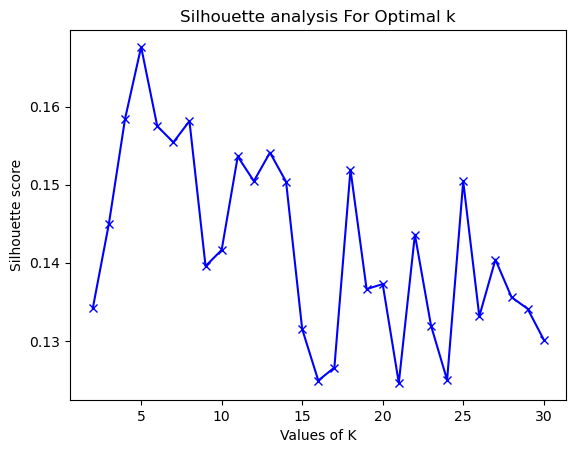

In [106]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30]
silhouette_avg = []
for num_clusters in range_n_clusters: 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(KG_embeddiongs_df.iloc[:,1:])
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(KG_embeddiongs_df.iloc[:,1:], cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [107]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12, random_state=0)
kmeans.fit(KG_embeddiongs_df.iloc[:,1:])
clusters = kmeans.predict(KG_embeddiongs_df.iloc[:,1:])
clusters_df = pd.DataFrame(data = clusters
             , columns = ['K_mean'])

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 6. Visualising classes 2D space by decomposing the attributes using T-SNE

In [108]:
tsne = TSNE(n_components=2, verbose=0, random_state=100, metric = 'cosine', perplexity=15.0)
#Binary
#tsne_binary = tsne.fit_transform(binary_attributes) 
#tsne_binary_df = pd.DataFrame(data = tsne_binary
             #, columns = ['Binary comp-1', 'Binary comp-2'])

#Continous
tsne_continous= tsne.fit_transform(KG_embeddiongs_df.iloc[:,1:]) 
tsne_continous_df = pd.DataFrame(data = tsne_continous
             , columns = ['Continous comp-1', 'Continous comp-2'])

#concat
#tsne_binary_df1 = pd.concat([tsne_binary_df, labels], axis = 1)
#tsne_binary_df1 = pd.concat([tsne_binary_df1, animal_type], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df, labels], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df1, taxonomy_df['order']], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df1, taxonomy_df['family']], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df1, clusters_df['K_mean']], axis = 1)

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [109]:
source = tsne_continous_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='Continous comp-1:Q',
    y='Continous comp-2:Q',
    color=alt.Color('K_mean:N', scale=alt.Scale(scheme='Magma'))
    ).properties(
    width=800,
    height=800
)

text1 = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='index:N'
)

text2 = points.mark_text(
    align='right',
    baseline='middle',
    dx=-10
).encode(
    text='K_mean:N'
)

points.interactive() + text1 + text2

alt.LayerChart(...)

In [110]:
source = tsne_continous_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='Continous comp-1:Q',
    y='Continous comp-2:Q',
    color=alt.Color('family:N', scale=alt.Scale(scheme='Magma'))
    ).properties(
    width=800,
    height=800
)

text = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='index:N'
)

points.interactive() + text

alt.LayerChart(...)

# 7. Covert to Binary Vectors

#### Threshold at 0

In [111]:
#b = np.where(KG_embeddiongs_df.iloc[:,1:]>=0, 1, KG_embeddiongs_df.iloc[:,1:])
#b = np.where(b<0, 0, b)
#binary_attributes_df = pd.DataFrame(data = b)

#### Threshold at mean

In [112]:
mean = np.mean(np.mean(KG_embeddiongs_df.iloc[:,1:]))
b = np.where(KG_embeddiongs_df.iloc[:,1:]>=mean, 1, KG_embeddiongs_df.iloc[:,1:])
b = np.where(b<mean, 0, b)
binary_attributes_df = pd.DataFrame(data = b)
binary_attributes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2710,2711,2712,2713,2714,2715,2716,2717,2718,2719
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


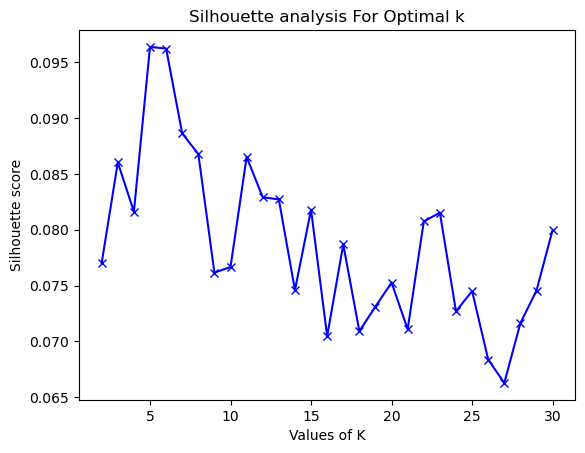

In [113]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30]
silhouette_avg = []
for num_clusters in range_n_clusters: 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(binary_attributes_df)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(binary_attributes_df, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [114]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=21, random_state=0)
kmeans.fit(binary_attributes_df)
clusters = kmeans.predict(binary_attributes_df)
clusters_df = pd.DataFrame(data = clusters
             , columns = ['K_mean'])

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [115]:
binary_attributes_df = pd.concat([binary_attributes_df, labels], axis = 1)
binary_attributes_df = pd.concat([binary_attributes_df, taxonomy_df['order']], axis = 1)
binary_attributes_df = pd.concat([binary_attributes_df, taxonomy_df['family']], axis = 1)
binary_attributes_df = pd.concat([binary_attributes_df, clusters_df['K_mean']], axis = 1)
binary_attributes_df.to_csv("C:\Dissertation\Data\Processed Data\Custom_Animal_Attribute_KG_binary_vectors.csv")
binary_attributes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2714,2715,2716,2717,2718,2719,index,order,family,K_mean
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,antelope,ARTIODACTYLA,BOVIDAE,4
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,grizzly+bear,CARNIVORA,URSIDAE,17
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,killer+whale,ARTIODACTYLA,DELPHINIDAE,6
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,beaver,RODENTIA,APLODONTIIDAE,9
4,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,dalmatian,CARNIVORA,CANIDAE,14


In [116]:
tsne = TSNE(n_components=2, verbose=0, random_state=100, metric = 'cosine', perplexity=15.0)
#binary
tsne_binary= tsne.fit_transform(binary_attributes_df.iloc[:,0:-4]) 
tsne_binary_df = pd.DataFrame(data = tsne_binary
             , columns = ['binarycomp-1', 'binarycomp-2'])

#concat
tsne_binary_df1 = pd.concat([tsne_binary_df, labels], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, taxonomy_df['order']], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, taxonomy_df['family']], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, clusters_df['K_mean']], axis = 1)

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [117]:
source = tsne_binary_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='binarycomp-1:Q',
    y='binarycomp-2:Q',
    color=alt.Color('K_mean:N', scale=alt.Scale(scheme='Magma'))
    ).properties(
    width=800,
    height=800
)

text1 = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='index:N'
)

text2 = points.mark_text(
    align='right',
    baseline='middle',
    dx=-10
).encode(
    text='K_mean:N'
)

points.interactive() + text1 + text2

alt.LayerChart(...)